noizy_dataの予測するためのネットワークを作成

In [ ]:
!pip install japanize_matplotlib | tail -n 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import japanize_matplotlib

%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/220918_send/noizy_data.csv", index_col=0)

In [ ]:
df

,x,y
0,-5.00000,-58.227625
1,-4.89899,-50.779422
2,-4.79798,-46.059515
3,-4.69697,-42.551186
4,-4.59596,-34.974764
...,...,...
95,4.59596,28.423812
96,4.69697,34.390215
97,4.79798,38.456813
98,4.89899,43.618069


In [ ]:
x = df.iloc[:, 0]

In [ ]:
y = df.iloc[:, 1]

In [ ]:
# pytorchを使うためにテンソル変数化
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [ ]:
X = X.view(-1, 1)
Y = Y.view(-1, 1)

In [ ]:
inputs = X
labels = Y

In [ ]:
X.shape

torch.Size([100, 1])

In [ ]:
Y.shape

torch.Size([100, 1])

In [ ]:
# 変数定義

# 入力次元=1
n_input = X.shape[1]

# 出力次元=1
n_output = 1

In [ ]:
# モデルのクラス定義

class Net(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()

    #出力層の定義
    self.l1 = nn.Linear(n_input, n_output)

    # 初期値の定義
    nn.init.constant_(self.l1.weight, 1.0)
    nn.init.constant_(self.l1.bias, 1.0)

  # 予測関数
  def forward(self, x):
    x1 = self.l1(x) # 線形回帰
    return x1

In [ ]:
# 学習率
lr = 0.001

# インスタンス生成
net = Net(n_input, n_output)

# 最適化アルゴリズム：勾配降下法
optimizer = optim.SGD(net.parameters(), lr = lr)

# 損失計算
criterion = nn.MSELoss()

# 繰り返し回数
num_epoch = 10000

# 記録
history = np.zeros((0, 2))

In [ ]:
# 繰り返し

for epoch in range(num_epoch):

  #勾配初期化
  optimizer.zero_grad()

  # 予測計算
  outputs = net(inputs)

  # 誤差計算
  loss = criterion(outputs, labels)

  # 勾配計算
  loss.backward()

  # 勾配降下法の適用
  optimizer.step()

  # 記録
  if(epoch % 100 == 0):
    history = np.vstack((history, np.array([epoch, loss.item()])))
    print(f"Epoch: {epoch} loss: {loss.item():.5f}")


Epoch: 0 loss: 403.33255
Epoch: 100 loss: 393.87445
Epoch: 200 loss: 387.94781
Epoch: 300 loss: 383.98999
Epoch: 400 loss: 381.33847
Epoch: 500 loss: 379.56183
Epoch: 600 loss: 378.37137
Epoch: 700 loss: 377.57370
Epoch: 800 loss: 377.03925
Epoch: 900 loss: 376.68112
Epoch: 1000 loss: 376.44116
Epoch: 1100 loss: 376.28040
Epoch: 1200 loss: 376.17267
Epoch: 1300 loss: 376.10049
Epoch: 1400 loss: 376.05206
Epoch: 1500 loss: 376.01968
Epoch: 1600 loss: 375.99792
Epoch: 1700 loss: 375.98340
Epoch: 1800 loss: 375.97366
Epoch: 1900 loss: 375.96716
Epoch: 2000 loss: 375.96277
Epoch: 2100 loss: 375.95981
Epoch: 2200 loss: 375.95786
Epoch: 2300 loss: 375.95657
Epoch: 2400 loss: 375.95569
Epoch: 2500 loss: 375.95505
Epoch: 2600 loss: 375.95465
Epoch: 2700 loss: 375.95438
Epoch: 2800 loss: 375.95425
Epoch: 2900 loss: 375.95410
Epoch: 3000 loss: 375.95401
Epoch: 3100 loss: 375.95398
Epoch: 3200 loss: 375.95395
Epoch: 3300 loss: 375.95395
Epoch: 3400 loss: 375.95395
Epoch: 3500 loss: 375.95392
Epoc

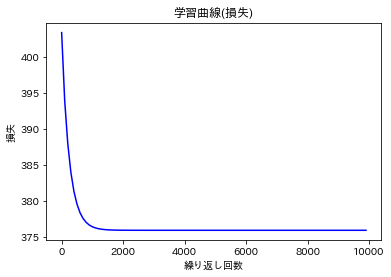

In [ ]:
# 学習曲線の表示 (損失)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()

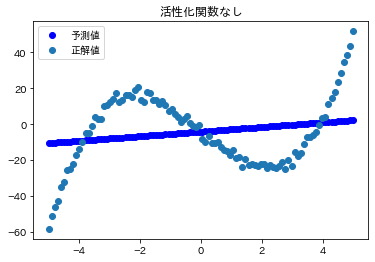

In [ ]:
# 結果のグラフ化
labels_pred = net(inputs)

plt.title('活性化関数なし')
plt.scatter(inputs.data, labels_pred.data, c='b', label='予測値')
plt.scatter(x, y,label='正解値')
plt.legend()
plt.show()

In [ ]:
# モデルのクラス定義
class Net(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()

    self.l1 = nn.Linear(n_input, 25)
    self.l2 = nn.Linear(25, 50)
    self.l3 = nn.Linear(50, n_output)
    self.relu = nn.ReLU(inplace=True)

  # 予測関数
  def forward(self, x):
    x1 = self.relu(self.l1(x))
    x2 = self.relu(self.l2(x1))
    x3 = self.l3(x2)
    return x3

In [ ]:
# 学習率
lr = 0.0001

# インスタンス生成
net = Net(n_input, n_output)

# 最適化アルゴリズム
optimizer = optim.SGD(net.parameters(), lr = lr)

# 損失関数
criterion = nn.MSELoss()

# 繰り返し回数
num_epoch = 50000

# 記録
history = np.zeros((0, 2))

In [ ]:
# 繰り返し処理

for epoch in range(num_epoch):

  # 勾配地初期値
  optimizer.zero_grad()

  # 予測関数
  outputs = net(inputs)

  # 誤差計算
  loss = criterion(outputs, labels)

  # 勾配計算
  loss.backward()

  # 勾配降下法
  optimizer.step()

  # 記録
  if(epoch % 100 == 0):
    history = np.vstack((history, np.array([epoch, loss.item()])))
    print(f"Epoch {epoch} loss: {loss.item():.5f}")

Epoch 0 loss: 406.14426
Epoch 100 loss: 398.83386
Epoch 200 loss: 391.73767
Epoch 300 loss: 384.61243
Epoch 400 loss: 379.12567
Epoch 500 loss: 375.27771
Epoch 600 loss: 371.80652
Epoch 700 loss: 367.92075
Epoch 800 loss: 363.30273
Epoch 900 loss: 357.53485
Epoch 1000 loss: 350.53403
Epoch 1100 loss: 341.83514
Epoch 1200 loss: 330.92477
Epoch 1300 loss: 317.18787
Epoch 1400 loss: 299.85989
Epoch 1500 loss: 278.04837
Epoch 1600 loss: 251.41872
Epoch 1700 loss: 220.53578
Epoch 1800 loss: 186.81192
Epoch 1900 loss: 153.06978
Epoch 2000 loss: 122.78478
Epoch 2100 loss: 98.21839
Epoch 2200 loss: 79.71796
Epoch 2300 loss: 65.72355
Epoch 2400 loss: 54.83610
Epoch 2500 loss: 46.24897
Epoch 2600 loss: 39.32703
Epoch 2700 loss: 33.64512
Epoch 2800 loss: 28.88246
Epoch 2900 loss: 25.00540
Epoch 3000 loss: 21.67294
Epoch 3100 loss: 18.96982
Epoch 3200 loss: 16.74367
Epoch 3300 loss: 14.92687
Epoch 3400 loss: 13.46395
Epoch 3500 loss: 12.26068
Epoch 3600 loss: 11.24495
Epoch 3700 loss: 10.40880
Epo

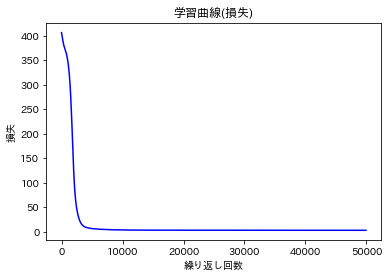

In [ ]:
# 学習曲線の表示 (損失)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()

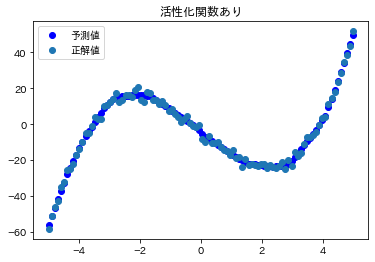

In [ ]:
# 結果のグラフ化
labels_pred = net(inputs)

plt.title('活性化関数あり')
plt.scatter(inputs.data, labels_pred.data, c='b', label='予測値')
plt.scatter(x, y,label='正解値')
plt.legend()
plt.show()

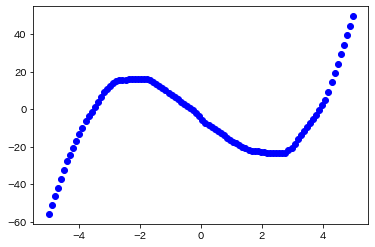

In [ ]:
plt.scatter(inputs.data, labels_pred.data, c='b', label='予測値')